In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, Input, Activation

# prepare data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

unlabeld_index = np.ones(y_train.shape, np.bool)

N = 20
for i in range(10):
  idx = np.where(y_train == i)[0][:N]
  unlabeld_index[idx] = 0

x_unlabeld = x_train[np.where(unlabeld_index)[0], ...]

x_train = x_train[np.where(~unlabeld_index)[0], ...]
y_train = y_train[np.where(~unlabeld_index)[0], ...]

170498071/170498071 [==============================] - 4s 0us/step


<ipython-input-2-2c2ed39229d7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  unlabeld_index = np.ones(y_train.shape, np.bool)


In [3]:
# examples of categorical crossentropy
cce = keras.losses.CategoricalCrossentropy()

# a labeled data from the second class
y_true = [[0, 1, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# an ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# another ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.1, 0.4, 0.3, 0.2]]
print(cce(y_true, y_pred).numpy())

0.051293306
0.0
0.0


# **PART A**

In [4]:
CLASSES = 10
BATCH_SIZE = 32
EPOCHS = 30
INPUT_SHAPE = x_train.shape[1:]

In [5]:
x_train = np.divide(x_train.astype('float32'), 255)
x_test = np.divide(x_test.astype('float32'), 255)
y_train = to_categorical(y_train, num_classes=CLASSES)
y_test = to_categorical(y_test, num_classes=CLASSES)

print("X train:\n", x_train.shape, "\n\nY train:\n", y_train.shape)

print("\nX test:\n", x_test.shape, "\n\nY test:\n", y_test.shape)

X train:
 (200, 32, 32, 3) 

Y train:
 (200, 10)

X test:
 (10000, 32, 32, 3) 

Y test:
 (10000, 10)


In [7]:
# Model
model_a = tensorflow.keras.Sequential([Input(shape=INPUT_SHAPE),
                                    Conv2D(32, (5, 5), padding="same"),
                                    Activation("relu"),
                                    BatchNormalization(axis=-1),
                                    MaxPooling2D(pool_size=(2, 2)),
                                    Dropout(0.25),
                                    Conv2D(64, (5, 5), padding="same"),
                                    Activation("relu"),
                                    BatchNormalization(axis=-1),
                                    MaxPooling2D(pool_size=(2, 2)),
                                    Dropout(0.3),
                                    Conv2D(128, (5, 5), padding="same"),
                                    Activation("relu"),
                                    BatchNormalization(axis=-1),
                                    MaxPooling2D(pool_size=(2, 2)),
                                    Dropout(0.3),
                                    Flatten(),
                                    Dense(512),
                                    Activation("relu"),
                                    BatchNormalization(),
                                    Dropout(0.3),
                                    Dense(10),
                                    Activation("softmax"),
                                    ])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        5

In [ ]:
model_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_a.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=[x_test, y_test])

Epoch 1/30
7/7 [==============================] - 11s 276ms/step - loss: 3.0087 - accuracy: 0.1500 - val_loss: 24.3879 - val_accuracy: 0.1012
Epoch 2/30
7/7 [==============================] - 1s 219ms/step - loss: 2.1555 - accuracy: 0.3250 - val_loss: 22.6548 - val_accuracy: 0.1106
Epoch 3/30
7/7 [==============================] - 3s 436ms/step - loss: 1.9188 - accuracy: 0.3950 - val_loss: 12.5693 - val_accuracy: 0.1470
Epoch 4/30
7/7 [==============================] - 1s 219ms/step - loss: 1.7515 - accuracy: 0.4200 - val_loss: 14.8233 - val_accuracy: 0.1123
Epoch 5/30
7/7 [==============================] - 1s 168ms/step - loss: 1.3706 - accuracy: 0.5400 - val_loss: 12.2588 - val_accuracy: 0.1560
Epoch 6/30
7/7 [==============================] - 1s 166ms/step - loss: 1.1725 - accuracy: 0.5750 - val_loss: 14.5783 - val_accuracy: 0.1205
Epoch 7/30
7/7 [==============================] - 1s 220ms/step - loss: 1.1125 - accuracy: 0.6050 - val_loss: 10.2781 - val_accuracy: 0.1475
Epoch 8/30
7

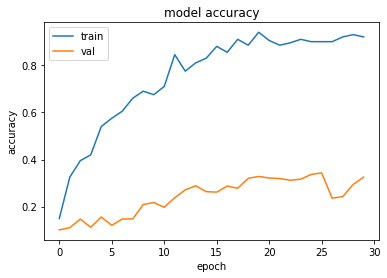

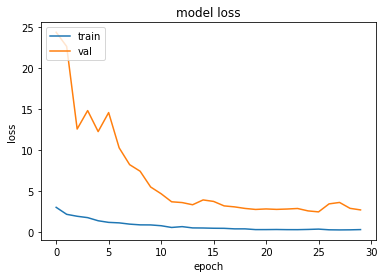

In [ ]:
# Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **PART B**

In [6]:
x_rotated = []
y_rotated = []

data = np.divide(x_unlabeld.astype('float32'), 255)

for img in data:
  for i in range(4):
    x = np.rot90(img, k=i)
    y = np.zeros(4)
    y[i] = 1
    x_rotated.append(x)
    y_rotated.append(y)

x_rotated = np.array(x_rotated)
y_rotated = np.array(y_rotated)

In [7]:
# Model
model_ssl = tensorflow.keras.Sequential([
  Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
  BatchNormalization(),
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPooling2D((2, 2)),
  Dropout(0.3),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  BatchNormalization(),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPooling2D((2, 2)),
  Dropout(0.3),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  BatchNormalization(),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  BatchNormalization(),
  MaxPooling2D((2, 2)),
  Dropout(0.3),
  Flatten(),
  Dense(64, activation='relu', kernel_initializer='he_uniform'),
  Dense(4, activation='softmax')])

model_ssl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [8]:
model_ssl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_ssl.fit(x_rotated, y_rotated,
                      batch_size=128,
                      epochs=10,
                      validation_split=0.2)

Epoch 1/10
1245/1245 [==============================] - 30s 17ms/step - loss: 0.9916 - accuracy: 0.5765 - val_loss: 0.8359 - val_accuracy: 0.6588
Epoch 2/10
1245/1245 [==============================] - 20s 16ms/step - loss: 0.7711 - accuracy: 0.6880 - val_loss: 0.7611 - val_accuracy: 0.6996
Epoch 3/10
1245/1245 [==============================] - 20s 16ms/step - loss: 0.6732 - accuracy: 0.7320 - val_loss: 0.6168 - val_accuracy: 0.7599
Epoch 4/10
1245/1245 [==============================] - 21s 17ms/step - loss: 0.6049 - accuracy: 0.7633 - val_loss: 0.5467 - val_accuracy: 0.7862
Epoch 5/10
1245/1245 [==============================] - 21s 17ms/step - loss: 0.5566 - accuracy: 0.7847 - val_loss: 0.5358 - val_accuracy: 0.7945
Epoch 6/10
1245/1245 [==============================] - 21s 17ms/step - loss: 0.5201 - accuracy: 0.7995 - val_loss: 0.5508 - val_accuracy: 0.7896
Epoch 7/10
1245/1245 [==============================] - 21s 17ms/step - loss: 0.4902 - accuracy: 0.8113 - val_loss: 0.5637 -

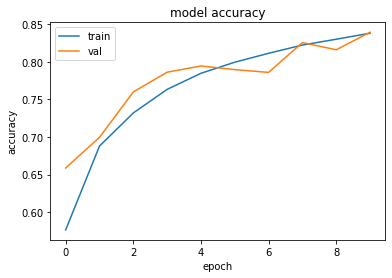

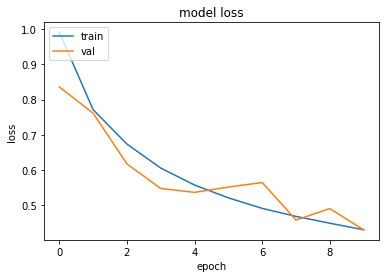

In [9]:
# Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
# Model
model_b = keras.Model(model_ssl.inputs, Dense(10 ,activation='softmax')(model_ssl.layers[-2].output))
model_b.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   

In [40]:
model_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_b.fit(x_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            validation_data=[x_test, y_test])

Epoch 1/30
7/7 [==============================] - 2s 250ms/step - loss: 7.5018 - accuracy: 0.1350 - val_loss: 4.5860 - val_accuracy: 0.1314
Epoch 2/30
7/7 [==============================] - 1s 221ms/step - loss: 3.7967 - accuracy: 0.2200 - val_loss: 3.6019 - val_accuracy: 0.1299
Epoch 3/30
7/7 [==============================] - 1s 221ms/step - loss: 2.5014 - accuracy: 0.2950 - val_loss: 3.0415 - val_accuracy: 0.1473
Epoch 4/30
7/7 [==============================] - 1s 186ms/step - loss: 1.9545 - accuracy: 0.3950 - val_loss: 2.6648 - val_accuracy: 0.1619
Epoch 5/30
7/7 [==============================] - 1s 187ms/step - loss: 1.4892 - accuracy: 0.4750 - val_loss: 2.5751 - val_accuracy: 0.1766
Epoch 6/30
7/7 [==============================] - 1s 180ms/step - loss: 1.2949 - accuracy: 0.5350 - val_loss: 2.5692 - val_accuracy: 0.1838
Epoch 7/30
7/7 [==============================] - 1s 180ms/step - loss: 1.2201 - accuracy: 0.5550 - val_loss: 2.5829 - val_accuracy: 0.1934
Epoch 8/30
7/7 [====

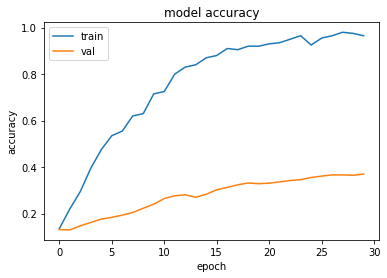

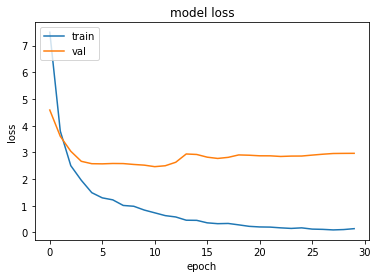

In [41]:
# Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **PART C**

In [10]:
# Base Model
l1 = Input(shape=(INPUT_SHAPE),)
l2 = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),activation='relu')(l1)
l3 = BatchNormalization(axis=-1)(l2)
l4 = MaxPooling2D(pool_size=(3, 3))(l3)
l5 = Dropout(rate=0.2)(l4)
l6 = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu')(l5)
l7 = BatchNormalization(axis=-1)(l6)
l8 = MaxPooling2D(pool_size=(2, 2))(l7)
l9 = Dropout(rate=0.2)(l8)
l10 = Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(l9)
l11 = BatchNormalization(axis=-1)(l10)
l12 = MaxPooling2D(pool_size=(2, 2))(l11)
l13 = Dropout(rate=0.2)(l12)
l14 = Flatten()(l13)
l15 = Dense(units=1024, activation='relu')(l14)
l16 = BatchNormalization()(l15)
output = Dropout(rate=0.2)(l16)
base_model = keras.Model(inputs=l1, outputs=output)

In [11]:
# Model

classifier = Dense(units=10, activation='softmax', name='classifier')(base_model.outputs[0])
rotator = Dense(units=4, activation='softmax', name='rotator')(base_model.outputs[0])

model_c = keras.Model(inputs=base_model.inputs, outputs=[classifier, rotator])

model_c.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 30, 30, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 30, 30, 32)  128         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 10, 10, 32)  0           ['batch_normalization_6[0][

In [12]:
x_rotated = np.zeros_like(x_unlabeld)
y_rotated = np.zeros((x_unlabeld.shape[0], 4))

y_train_class = np.concatenate((y_train, np.zeros((x_rotated.shape[0], 10))), axis=0)
y_train_rot = np.concatenate((np.zeros((y_train.shape[0], 4)), y_rotated), axis=0)

x_train = np.concatenate((x_train, x_rotated), axis=0)
y_train = [y_train_class, y_train_rot]

print(x_train.shape)
print(y_train[0].shape)
print(y_train[1].shape)

(50000, 32, 32, 3)
(50000, 10)
(50000, 4)


In [13]:
model_c.compile(optimizer='adam', metrics=['accuracy'], loss_weights={'classifier': 10,'rotator': 1}, loss='categorical_crossentropy')

history = model_c.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_data=(x_test, {'classifier': y_test})
)

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 0.2183 - classifier_loss: 0.0218 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.1568 - rotator_accuracy: 0.2185 - val_loss: 1827.5514 - val_classifier_loss: 182.7551 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy: 0.0997 - val_rotator_accuracy: 0.0000e+00
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2484 - classifier_loss: 0.0248 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.1224 - rotator_accuracy: 0.2317 - val_loss: 5762.5664 - val_classifier_loss: 576.2567 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy: 0.1000 - val_rotator_accuracy: 0.0000e+00
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2773 - classifier_loss: 0.0277 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.1147 - rotator_accuracy: 0.2363 - val_loss: 7716.5322 - val_classifier_loss: 771.6533 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy

In [14]:
model_c.compile(optimizer='adam', metrics=['accuracy'], loss_weights={'classifier': 1,'rotator': 10}, loss='categorical_crossentropy')

history = model_c.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_data=(x_test, {'classifier': y_test})
)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0141 - classifier_loss: 0.0141 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.0741 - rotator_accuracy: 0.2865 - val_loss: 79.7521 - val_classifier_loss: 79.7521 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy: 0.0996 - val_rotator_accuracy: 0.0000e+00
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0122 - classifier_loss: 0.0122 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.0908 - rotator_accuracy: 0.2762 - val_loss: 96.7242 - val_classifier_loss: 96.7242 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy: 0.1000 - val_rotator_accuracy: 0.0000e+00
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0111 - classifier_loss: 0.0111 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.0952 - rotator_accuracy: 0.2745 - val_loss: 180.1779 - val_classifier_loss: 180.1779 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy: 0.100

In [16]:
model_c.compile(optimizer='adam', metrics=['accuracy'], loss_weights={'classifier': 1,'rotator': 1}, loss='categorical_crossentropy')

history = model_c.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_data=(x_test, {'classifier': y_test})
)

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 0.0173 - classifier_loss: 0.0173 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.1094 - rotator_accuracy: 0.2462 - val_loss: 141.2384 - val_classifier_loss: 141.2384 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy: 0.1000 - val_rotator_accuracy: 0.0000e+00
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0190 - classifier_loss: 0.0190 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.1010 - rotator_accuracy: 0.2561 - val_loss: 192.6467 - val_classifier_loss: 192.6467 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy: 0.1000 - val_rotator_accuracy: 0.0000e+00
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0193 - classifier_loss: 0.0193 - rotator_loss: 0.0000e+00 - classifier_accuracy: 0.1007 - rotator_accuracy: 0.2542 - val_loss: 125.7262 - val_classifier_loss: 125.7262 - val_rotator_loss: 0.0000e+00 - val_classifier_accuracy: 0